# Epidemic Mitigation
The purpose of this notebook is to show some of the functions and classes provided in the Python code `sir.py`, and to use a minimal example to calculate the least-time trajectories and bounding curves $\Phi$, $\tau$ and $\Theta$ for the solution of the problem.

The following code cells show how the trajectory can be obtained from an arbitrary initial condition, with arbitrary parameters.

In [1]:
import sir
import matplotlib.pyplot as plt

In [2]:
### Set your parameters. The class ALWAYS takes imax and umax, but can handle
### either beta/gamma or r0. Set the ones you wish to use, and leave the rest
### as None. In this case, I set beta and gamma and leave r0 as None.

imax = 0.1
umax = 0.5
gamma = 0.2
beta = 0.5
r0 = None

if r0 is None:
    A = sir.SIR()
    A.set_params([imax, umax, gamma, beta], flag = "bg")
elif beta is None and gamma is None:
    A = sir.SIR()
    A.set_params([imax, umax, r0], flag = "r")
else:
    print("Please enter the parameters in a valid way.")

In [3]:
### Set an initial point for your system, get important features, and find the
### trajectory of least time to the safe zone.

s0, i0 = [0.8, 0.06]    # Set an arbitrary initial condition
P = A.add_point(s0, i0) # Add it to a set of points in the system
#A.find_curves()
A.find_regions()
A.get_shortest()
T = P.least_time

## Commutation Curve
A curve at which all shortest-time trajectories turn the control on. It is obtained via numeric simulations of the system, which might be slow but works fine.

In [4]:
sir.find_commutation_curve(A)

/home/rmm/Documents/sir/sir.py:585: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  t, err = scipy.integrate.quad(self._int, start, end)
/home/rmm/Documents/sir/sir.py:585: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t, err = scipy.integrate.quad(self._int, start, end)


Now we plot everything.

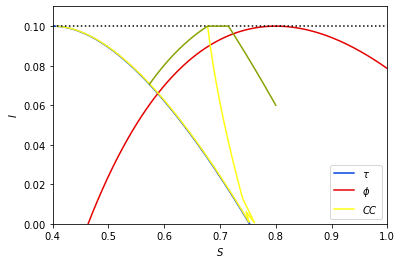

In [5]:
fig, ax = plt.subplots()
ax.set_xlim(A.sbar, 1)
ax.set_xlabel(r"$S$")
ax.set_ylim(0, A.imax*1.1)
ax.set_ylabel(r"$I$")
ax.plot(A.tau.s, A.tau.i, color = "xkcd:blue", linestyle = "-")
ax.plot(A.phi.s, A.phi.i, color = "xkcd:red", linestyle = "-")
ax.plot(A.commutation_curve[0], A.commutation_curve[1], color = "xkcd:yellow", linestyle = "-")
ax.legend([r"$\tau$", r"$\phi$", r"$CC$"])
ax.plot([A.sbar, 1], [A.imax, A.imax], color = "xkcd:black", linestyle = ":")
ax.plot(T.s, T.i, color = "xkcd:vomit green", linestyle = "-")

We can also color the phase-plane depending on the control. All regions of color red require the maximum control, while regions with color blue require no control. Please note that this function does not run if the commutation curve has not been calculated before.

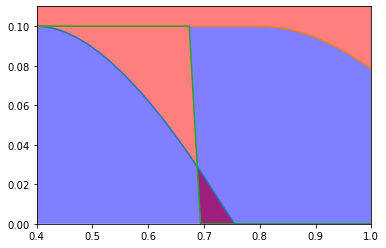

In [6]:
sir.plot_curves(A)

Finally, we can also plot the time-series for the control along a trajectory starting at a set point. Note that the variable `T` used here is the `Trajectory` object calculated before.

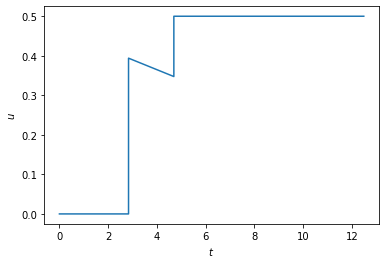

In [7]:
T.plot_time()